In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ast
from tfnet.evaluation import get_mean_auc, get_auc, get_mean_f1, get_mean_balanced_accuracy_score, get_mean_recall, get_mean_aupr, get_aupr, get_mean_precision
import gzip


In [ ]:
tf_counts = []
with open('./data/GM12878.count.each.column', 'r') as fp:
    for line in fp:
        tf_counts.append(int(line.rstrip()))

In [ ]:
filter_fc_GM12878_df = pd.read_csv("./results/filter_fc_SimpleCNN_2d_GM12878_deepSEA.eval.repl.tsv", header=0, index_col=0, sep="\t")
GM12878_df = pd.read_csv("./results/SimpleCNN_2d_GM12878_deepSEA.eval.repl.tsv", header=0, index_col=0, sep="\t")
filter_fc_GM12878_df.columns = [ "filter_"+i for i in filter_fc_GM12878_df.columns.tolist()]
merge_df = pd.concat([GM12878_df, filter_fc_GM12878_df], axis=1)
merge_df['datasize'] = tf_counts

In [ ]:
plt.rcParams.update({'font.size': 5})
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
fig, ax =plt.subplots(4,1,constrained_layout=True, figsize=(25, 40), sharex=False)
#plt.figure(dpi=150,figsize=(30,8))
g1 = sns.barplot(data=merge_df, x="TF_name", y="AUC",hue="datasize", ax=ax[0])
g1.axhline(0.9, color='r', dashes=(2,2))
g1.xaxis()
g1.legend(loc='upper right')
h1 = sns.histplot(data=merge_df, x="AUC", kde=True, ax=ax[1])
g2 = sns.barplot(data=merge_df, x="TF_name", y="AUPR",hue="datasize", ax=ax[2])
g2.axhline(0.35, color='r', dashes=(2,2))
h2 = sns.histplot(data=merge_df, x="AUPR", kde=True, ax=ax[3])
ax[0].get_legend().remove()
ax[0].set_xlabel('')
ax[1].set_xlabel('')
ax[2].set_xlabel('')
ax[3].set_xlabel('')
#plt.xticks(rotation=90)
for tick in ax[0].get_xticklabels():
    tick.set_rotation(45)


for tick in ax[2].get_xticklabels():
    tick.set_rotation(45)

plt.legend(loc='upper right')
plt.savefig("results/test.pdf")

### remove low AUC/AUPR TFs

In [ ]:
merge_df['AUC'].mean()
merge_df['AUPR'].mean()
# remove tfs in GM12878
# due to AUC 
print("Count of AUC lower than 0.85: ",sum(merge_df['AUC'] < 0.85))
AUC_remove = merge_df[merge_df['AUC'] < 0.85]['TF_name'].tolist()
#AUC_remove = merge_df.sort_values('AUC').head(2)['TF_name'].tolist()

# due to AUPR
print("Count of AUPR lower than 0.1: ",sum(merge_df['AUC'] < 0.85))
AUPR_remove = merge_df[merge_df['AUPR'] < 0.1]['TF_name'].tolist()
#AUPR_remove = merge_df.sort_values('AUPR').head(13)['TF_name'].tolist()

print("AUC after filter: ", merge_df[~merge_df['TF_name'].isin(set(AUC_remove + AUPR_remove))]['AUC'].mean())
print("AUPR after filter ", merge_df[~merge_df['TF_name'].isin(set(AUC_remove + AUPR_remove))]['AUPR'].mean())

In [ ]:
merge_df[['TF_name','AUC','filter_AUC','datasize']].melt(['TF_name','datasize'], ['AUC','filter_AUC'])

custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
plt.figure(dpi=150,figsize=(50,8))
g = sns.barplot(data=merge_df[['TF_name','AUC','filter_AUC','datasize']].melt(['TF_name','datasize'], ['AUC','filter_AUC']), x="TF_name", y="value",hue="variable")
g.axhline(0.9, color='r', dashes=(2,2))
plt.xticks(rotation=90)
plt.legend(loc='upper right')
#plt.show()





plt.savefig("results/test2.pdf")

### Compare Models in GM12878 test data set

In [6]:
#scFAN DeepATT DanQ TBiNet Deepformer
scFAN_GM12878_noweight = pd.read_csv("results/model_compare_GM12878/scFAN_GM12878_noweight.eval.repl.tsv", header=0, index_col=0, sep="\t")
DeepATT_GM12878_noweight = pd.read_csv("results/model_compare_GM12878/DeepATT_GM12878_noweight.eval.repl.tsv", header=0, index_col=0, sep="\t")
DanQ_GM12878_noweight = pd.read_csv("results/model_compare_GM12878/DanQ_GM12878_noweight.eval.repl.tsv", header=0, index_col=0, sep="\t")
TBiNet_GM12878_noweight = pd.read_csv("results/model_compare_GM12878/TBiNet_GM12878_noweight.eval.repl.tsv", header=0, index_col=0, sep="\t")
Deepformer_GM12878_noweight = pd.read_csv("results/model_compare_GM12878/Deepformer_GM12878_noweight.eval.repl.tsv", header=0, index_col=0, sep="\t")

In [7]:
scFAN_GM12878 = pd.read_csv("results/model_compare_GM12878/scFAN_GM12878.eval.repl.tsv", header=0, index_col=0, sep="\t")
DeepATT_GM12878 = pd.read_csv("results/model_compare_GM12878/DeepATT_GM12878.eval.repl.tsv", header=0, index_col=0, sep="\t")
DanQ_GM12878 = pd.read_csv("results/model_compare_GM12878/DanQ_GM12878.eval.repl.tsv", header=0, index_col=0, sep="\t")
TBiNet_GM12878 = pd.read_csv("results/model_compare_GM12878/TBiNet_GM12878.eval.repl.tsv", header=0, index_col=0, sep="\t")
Deepformer_GM12878 = pd.read_csv("results/model_compare_GM12878/Deepformer_GM12878.eval.repl.tsv", header=0, index_col=0, sep="\t")

In [14]:
scFAN_GM12878_noweight["Model"] = "scFAN"
DeepATT_GM12878_noweight["Model"] = "DeepATT"
DanQ_GM12878_noweight["Model"] = "DanQ"
TBiNet_GM12878_noweight["Model"] = "TBiNet"
Deepformer_GM12878_noweight["Model"] = "DeepFormer"

scFAN_GM12878["Model"] = "scFAN"
DeepATT_GM12878["Model"] = "DeepATT"
DanQ_GM12878["Model"] = "DanQ"
TBiNet_GM12878["Model"] = "TBiNet"
Deepformer_GM12878["Model"] = "DeepFormer"

### TBiNet Compare with others

AUC Positive percent  0.5871559633027523
AUPR Positive percent  0.6605504587155964
AUC difference  -0.0009278987658530857
AUPR difference  0.004160218832028939
0.9364643476483638 0.9373922464142169
0.22811179173230822 0.22395157290027928


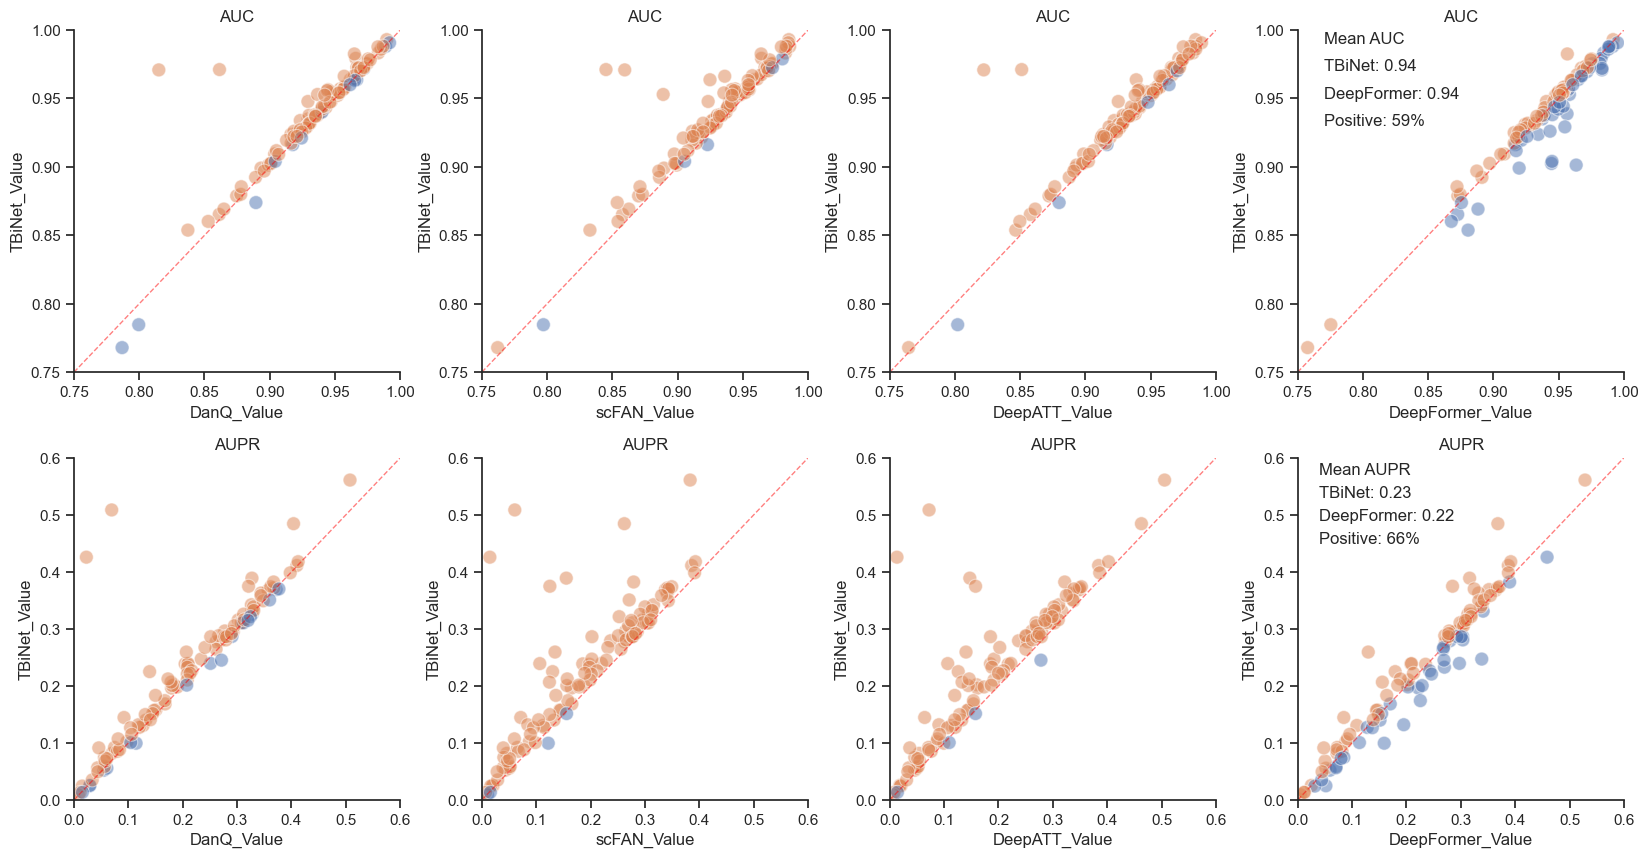

In [147]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)

fig, axs = plt.subplots(ncols=4,nrows=2,)
plt.subplots_adjust(wspace=0.25, hspace=0.25)
plt.rcParams['figure.figsize']= (20, 10)
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)

# ---------------------- DanQ ---------------------- #
plot_data = pd.merge(DanQ_GM12878_noweight.melt(id_vars=["TF_name"], value_vars=["AUC"], value_name="DanQ_Value"), TBiNet_GM12878_noweight.melt(id_vars=["TF_name"], value_vars=["AUC"], value_name="TBiNet_Value"), on=["TF_name","variable"], how="inner")
plot_data['group'] = plot_data['DanQ_Value'] < plot_data['TBiNet_Value']
sns.scatterplot(data=plot_data,
                x="DanQ_Value", y="TBiNet_Value", alpha=0.5, hue='group', ax=axs[0,0], legend=False, s=100
)
xlim=(0.75,1); ylim=(0.75,1)
axs[0,0].plot(xlim, ylim, ls="--", lw =1, alpha=0.5, c="red")
axs[0,0].set(xlim=xlim,ylim=ylim)
axs[0,0].set_title("AUC")

plot_data = pd.merge(DanQ_GM12878_noweight.melt(id_vars=["TF_name"], value_vars=["AUPR"], value_name="DanQ_Value"), TBiNet_GM12878_noweight.melt(id_vars=["TF_name"], value_vars=["AUPR"], value_name="TBiNet_Value"), on=["TF_name","variable"], how="inner")
plot_data['group'] = plot_data['DanQ_Value'] < plot_data['TBiNet_Value']
sns.scatterplot(data=plot_data,
                x="DanQ_Value", y="TBiNet_Value", alpha=0.5, hue='group', ax=axs[1,0], legend=False, s=100
)
xlim=(0, 0.6); ylim=(0,0.6)
axs[1,0].plot(xlim, ylim, ls="--", lw =1, alpha=0.5, c="red")
axs[1,0].set(xlim=xlim, ylim=ylim)
axs[1,0].set_title("AUPR")

# ---------------------- scFAN ---------------------- #
plot_data = pd.merge(scFAN_GM12878_noweight.melt(id_vars=["TF_name"], value_vars=["AUC"], value_name="scFAN_Value"), TBiNet_GM12878_noweight.melt(id_vars=["TF_name"], value_vars=["AUC"], value_name="TBiNet_Value"), on=["TF_name","variable"], how="inner")
plot_data['group'] = plot_data['scFAN_Value'] < plot_data['TBiNet_Value']
sns.scatterplot(data=plot_data,
                x="scFAN_Value", y="TBiNet_Value", alpha=0.5, hue='group', ax=axs[0,1], legend=False, s=100
)
xlim=(0.75,1); ylim=(0.75,1)
axs[0,1].plot(xlim, ylim, ls="--", lw =1, alpha=0.5, c="red")
axs[0,1].set(xlim=xlim,ylim=ylim)
axs[0,1].set_title("AUC")

plot_data = pd.merge(scFAN_GM12878_noweight.melt(id_vars=["TF_name"], value_vars=["AUPR"], value_name="scFAN_Value"), TBiNet_GM12878_noweight.melt(id_vars=["TF_name"], value_vars=["AUPR"], value_name="TBiNet_Value"), on=["TF_name","variable"], how="inner")
plot_data['group'] = plot_data['scFAN_Value'] < plot_data['TBiNet_Value']
sns.scatterplot(data=plot_data,
                x="scFAN_Value", y="TBiNet_Value", alpha=0.5, hue='group', ax=axs[1,1], legend=False, s=100
)
xlim=(0, 0.6); ylim=(0,0.6)
axs[1,1].plot(xlim, ylim, ls="--", lw =1, alpha=0.5, c="red")
axs[1,1].set(xlim=xlim, ylim=ylim)
axs[1,1].set_title("AUPR")

# ---------------------- DeepATT ---------------------- #
plot_data = pd.merge(DeepATT_GM12878_noweight.melt(id_vars=["TF_name"], value_vars=["AUC"], value_name="DeepATT_Value"), TBiNet_GM12878_noweight.melt(id_vars=["TF_name"], value_vars=["AUC"], value_name="TBiNet_Value"), on=["TF_name","variable"], how="inner")
plot_data['group'] = plot_data['DeepATT_Value'] < plot_data['TBiNet_Value']
sns.scatterplot(data=plot_data,
                x="DeepATT_Value", y="TBiNet_Value", alpha=0.5, hue='group', ax=axs[0,2], legend=False, s=100
)
xlim=(0.75,1); ylim=(0.75,1)
axs[0,2].plot(xlim, ylim, ls="--", lw =1, alpha=0.5, c="red")
axs[0,2].set(xlim=xlim,ylim=ylim)
axs[0,2].set_title("AUC")

plot_data = pd.merge(DeepATT_GM12878_noweight.melt(id_vars=["TF_name"], value_vars=["AUPR"], value_name="DeepATT_Value"), TBiNet_GM12878_noweight.melt(id_vars=["TF_name"], value_vars=["AUPR"], value_name="TBiNet_Value"), on=["TF_name","variable"], how="inner")
plot_data['group'] = plot_data['DeepATT_Value'] < plot_data['TBiNet_Value']
sns.scatterplot(data=plot_data,
                x="DeepATT_Value", y="TBiNet_Value", alpha=0.5, hue='group', ax=axs[1,2], legend=False, s=100
)
xlim=(0, 0.6); ylim=(0,0.6)
axs[1,2].plot(xlim, ylim, ls="--", lw =1, alpha=0.5, c="red")
axs[1,2].set(xlim=xlim, ylim=ylim)
axs[1,2].set_title("AUPR")

# ---------------------- DeepFormer ---------------------- #
auc_plot_data = pd.merge(Deepformer_GM12878_noweight.melt(id_vars=["TF_name"], value_vars=["AUC"], value_name="DeepFormer_Value"), TBiNet_GM12878_noweight.melt(id_vars=["TF_name"], value_vars=["AUC"], value_name="TBiNet_Value"), on=["TF_name","variable"], how="inner")
auc_plot_data['group'] = auc_plot_data['DeepFormer_Value'] < auc_plot_data['TBiNet_Value']
aupr_plot_data = pd.merge(Deepformer_GM12878_noweight.melt(id_vars=["TF_name"], value_vars=["AUPR"], value_name="DeepFormer_Value"), TBiNet_GM12878_noweight.melt(id_vars=["TF_name"], value_vars=["AUPR"], value_name="TBiNet_Value"), on=["TF_name","variable"], how="inner")
aupr_plot_data['group'] = aupr_plot_data['DeepFormer_Value'] < aupr_plot_data['TBiNet_Value']
print("AUC Positive percent ",sum(auc_plot_data['group'])/len(auc_plot_data['group']))
print("AUPR Positive percent ",sum(aupr_plot_data['group'])/len(aupr_plot_data['group']))
print("AUC difference ", auc_plot_data['TBiNet_Value'].mean() - auc_plot_data['DeepFormer_Value'].mean())
print("AUPR difference ", aupr_plot_data['TBiNet_Value'].mean() - aupr_plot_data['DeepFormer_Value'].mean())
print(auc_plot_data['TBiNet_Value'].mean(), auc_plot_data['DeepFormer_Value'].mean())
print(aupr_plot_data['TBiNet_Value'].mean(), aupr_plot_data['DeepFormer_Value'].mean())

# ---------------------- section ---------------------- #

plot_data = pd.merge(Deepformer_GM12878_noweight.melt(id_vars=["TF_name"], value_vars=["AUC"], value_name="DeepFormer_Value"), TBiNet_GM12878_noweight.melt(id_vars=["TF_name"], value_vars=["AUC"], value_name="TBiNet_Value"), on=["TF_name","variable"], how="inner")
plot_data['group'] = plot_data['DeepFormer_Value'] < plot_data['TBiNet_Value']
sns.scatterplot(data=plot_data,
                x="DeepFormer_Value", y="TBiNet_Value", alpha=0.5, hue='group', ax=axs[0,3], legend=False, s=100
)
xlim=(0.75,1); ylim=(0.75,1)
axs[0,3].plot(xlim, ylim, ls="--", lw =1, alpha=0.5, c="red")
axs[0,3].set(xlim=xlim,ylim=ylim)
axs[0,3].set_title("AUC")
axs[0,3].text(0.77, 0.99, f"Mean AUC" )
axs[0,3].text(0.77, 0.97, f"TBiNet: 0.94" )
axs[0,3].text(0.77, 0.95, f"DeepFormer: 0.94" )
axs[0,3].text(0.77, 0.93, f"Positive: 59%" )

plot_data = pd.merge(Deepformer_GM12878_noweight.melt(id_vars=["TF_name"], value_vars=["AUPR"], value_name="DeepFormer_Value"), TBiNet_GM12878_noweight.melt(id_vars=["TF_name"], value_vars=["AUPR"], value_name="TBiNet_Value"), on=["TF_name","variable"], how="inner")
plot_data['group'] = plot_data['DeepFormer_Value'] < plot_data['TBiNet_Value']

sns.scatterplot(data=plot_data,
                x="DeepFormer_Value", y="TBiNet_Value", alpha=0.5, hue='group', ax=axs[1,3], legend=False, s=100
)
xlim=(0, 0.6); ylim=(0,0.6)
axs[1,3].plot(xlim, ylim, ls="--", lw =1, alpha=0.5, c="red")
axs[1,3].set(xlim=xlim, ylim=ylim)
axs[1,3].set_title("AUPR")
axs[1,3].text(0.04, 0.57, f"Mean AUPR" )
axs[1,3].text(0.04, 0.53, f"TBiNet: 0.23" )
axs[1,3].text(0.04, 0.49, f"DeepFormer: 0.22" )
axs[1,3].text(0.04, 0.45, f"Positive: 66%" )


fig.savefig("results/model.TBiNet.compare.GM12878.pdf")

### TBiNet weight/noweight

AUC Positive percent  0.6238532110091743
AUPR Positive percent  0.6146788990825688
AUC difference  0.0008972433320459938
AUPR difference  0.0010766817866666722
0.9373615909804098 0.9364643476483638
0.2291884735189749 0.22811179173230822


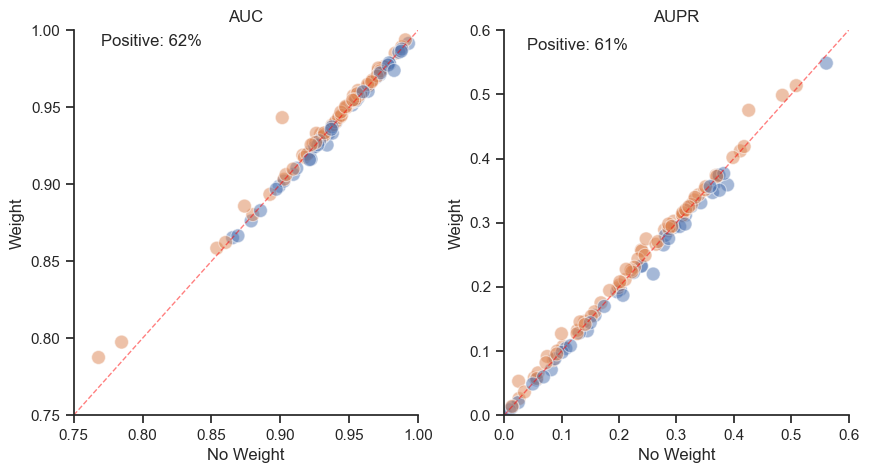

In [207]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)

fig, axs = plt.subplots(ncols=2)
plt.subplots_adjust(wspace=0.25, hspace=0.25)
plt.rcParams['figure.figsize']= (10, 5)
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)


auc_plot_data = pd.merge(TBiNet_GM12878_noweight.melt(id_vars=["TF_name"], value_vars=["AUC"], value_name="No Weight"), TBiNet_GM12878.melt(id_vars=["TF_name"], value_vars=["AUC"], value_name="Weight"), on=["TF_name","variable"], how="inner")
auc_plot_data['group'] = auc_plot_data['No Weight'] < auc_plot_data['Weight']
aupr_plot_data = pd.merge(TBiNet_GM12878_noweight.melt(id_vars=["TF_name"], value_vars=["AUPR"], value_name="No Weight"), TBiNet_GM12878.melt(id_vars=["TF_name"], value_vars=["AUPR"], value_name="Weight"), on=["TF_name","variable"], how="inner")
aupr_plot_data['group'] = aupr_plot_data['No Weight'] < aupr_plot_data['Weight']
print("AUC Positive percent ",sum(auc_plot_data['group'])/len(auc_plot_data['group']))
print("AUPR Positive percent ",sum(aupr_plot_data['group'])/len(aupr_plot_data['group']))
print("AUC difference ", auc_plot_data['Weight'].mean() - auc_plot_data['No Weight'].mean())
print("AUPR difference ", aupr_plot_data['Weight'].mean() - aupr_plot_data['No Weight'].mean())
print(auc_plot_data['Weight'].mean(), auc_plot_data['No Weight'].mean())
print(aupr_plot_data['Weight'].mean(), aupr_plot_data['No Weight'].mean())


# ---------------------- AUC ---------------------- #
plot_data = pd.merge(TBiNet_GM12878_noweight.melt(id_vars=["TF_name"], value_vars=["AUC"], value_name="No Weight"), TBiNet_GM12878.melt(id_vars=["TF_name"], value_vars=["AUC"], value_name="Weight"), on=["TF_name","variable"], how="inner")
plot_data['group'] = plot_data['No Weight'] < plot_data['Weight']
sns.scatterplot(data=plot_data,
                x="No Weight", y="Weight", alpha=0.5, hue='group', ax=axs[0], legend=False, s=100
)
xlim=(0.75,1); ylim=(0.75,1)
axs[0].plot(xlim, ylim, ls="--", lw =1, alpha=0.5, c="red")
axs[0].set(xlim=xlim,ylim=ylim)
axs[0].set_title("AUC")

axs[0].text(0.77, 0.99, f"Positive: 62%" )


# ---------------------- AUPR ---------------------- #
plot_data = pd.merge(TBiNet_GM12878_noweight.melt(id_vars=["TF_name"], value_vars=["AUPR"], value_name="No Weight"), TBiNet_GM12878.melt(id_vars=["TF_name"], value_vars=["AUPR"], value_name="Weight"), on=["TF_name","variable"], how="inner")
plot_data['group'] = plot_data['No Weight'] < plot_data['Weight']
sns.scatterplot(data=plot_data,
                x="No Weight", y="Weight", alpha=0.5, hue='group', ax=axs[1], legend=False, s=100
)
xlim=(0, 0.6); ylim=(0,0.6)
axs[1].plot(xlim, ylim, ls="--", lw =1, alpha=0.5, c="red")
axs[1].set(xlim=xlim, ylim=ylim)
axs[1].set_title("AUPR")
axs[1].text(0.04, 0.57, f"Positive: 61%" )

fig.savefig("results/model.TBiNet.compare.GM12878.weight.auc.aupr.pdf")


### DeepFormer Compare with others

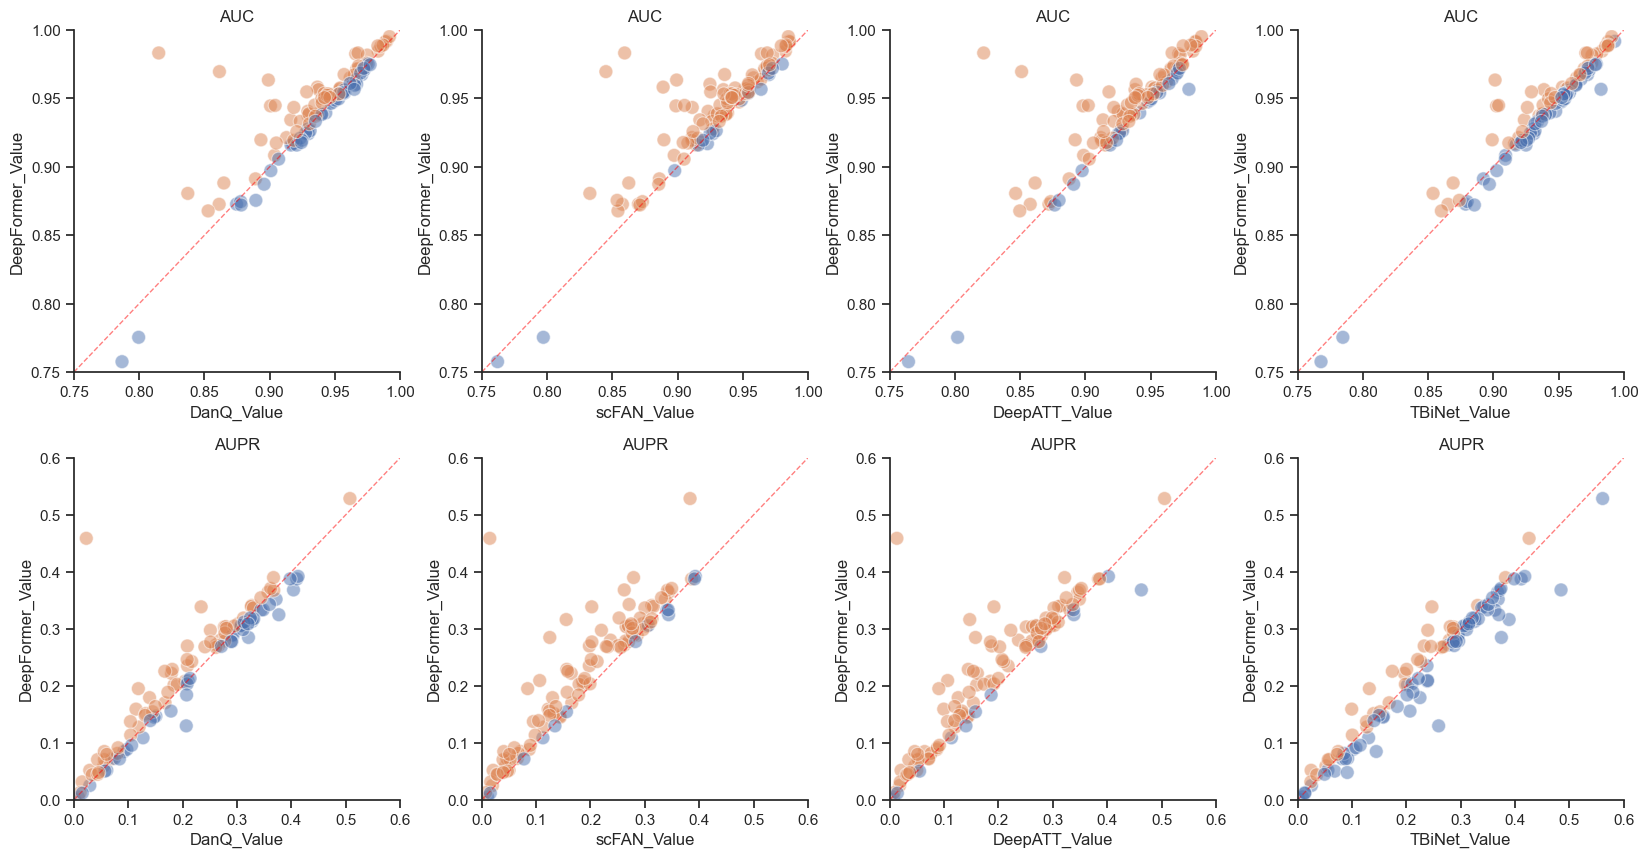

In [114]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)

fig, axs = plt.subplots(ncols=4,nrows=2,)
plt.subplots_adjust(wspace=0.25, hspace=0.25)
plt.rcParams['figure.figsize']= (20, 10)
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)

# ---------------------- DanQ ---------------------- #
plot_data = pd.merge(DanQ_GM12878_noweight.melt(id_vars=["TF_name"], value_vars=["AUC"], value_name="DanQ_Value"), Deepformer_GM12878_noweight.melt(id_vars=["TF_name"], value_vars=["AUC"], value_name="DeepFormer_Value"), on=["TF_name","variable"], how="inner")
plot_data['group'] = plot_data['DanQ_Value'] < plot_data['DeepFormer_Value']
sns.scatterplot(data=plot_data,
                x="DanQ_Value", y="DeepFormer_Value", alpha=0.5, hue='group', ax=axs[0,0], legend=False, s=100
)
xlim=(0.75,1); ylim=(0.75,1)
axs[0,0].plot(xlim, ylim, ls="--", lw =1, alpha=0.5, c="red")
axs[0,0].set(xlim=xlim,ylim=ylim)
axs[0,0].set_title("AUC")

plot_data = pd.merge(DanQ_GM12878_noweight.melt(id_vars=["TF_name"], value_vars=["AUPR"], value_name="DanQ_Value"), Deepformer_GM12878_noweight.melt(id_vars=["TF_name"], value_vars=["AUPR"], value_name="DeepFormer_Value"), on=["TF_name","variable"], how="inner")
plot_data['group'] = plot_data['DanQ_Value'] < plot_data['DeepFormer_Value']
sns.scatterplot(data=plot_data,
                x="DanQ_Value", y="DeepFormer_Value", alpha=0.5, hue='group', ax=axs[1,0], legend=False, s=100
)
xlim=(0, 0.6); ylim=(0,0.6)
axs[1,0].plot(xlim, ylim, ls="--", lw =1, alpha=0.5, c="red")
axs[1,0].set(xlim=xlim, ylim=ylim)
axs[1,0].set_title("AUPR")

# ---------------------- scFAN ---------------------- #
plot_data = pd.merge(scFAN_GM12878_noweight.melt(id_vars=["TF_name"], value_vars=["AUC"], value_name="scFAN_Value"), Deepformer_GM12878_noweight.melt(id_vars=["TF_name"], value_vars=["AUC"], value_name="DeepFormer_Value"), on=["TF_name","variable"], how="inner")
plot_data['group'] = plot_data['scFAN_Value'] < plot_data['DeepFormer_Value']
sns.scatterplot(data=plot_data,
                x="scFAN_Value", y="DeepFormer_Value", alpha=0.5, hue='group', ax=axs[0,1], legend=False, s=100
)
xlim=(0.75,1); ylim=(0.75,1)
axs[0,1].plot(xlim, ylim, ls="--", lw =1, alpha=0.5, c="red")
axs[0,1].set(xlim=xlim,ylim=ylim)
axs[0,1].set_title("AUC")

plot_data = pd.merge(scFAN_GM12878_noweight.melt(id_vars=["TF_name"], value_vars=["AUPR"], value_name="scFAN_Value"), Deepformer_GM12878_noweight.melt(id_vars=["TF_name"], value_vars=["AUPR"], value_name="DeepFormer_Value"), on=["TF_name","variable"], how="inner")
plot_data['group'] = plot_data['scFAN_Value'] < plot_data['DeepFormer_Value']
sns.scatterplot(data=plot_data,
                x="scFAN_Value", y="DeepFormer_Value", alpha=0.5, hue='group', ax=axs[1,1], legend=False, s=100
)
xlim=(0, 0.6); ylim=(0,0.6)
axs[1,1].plot(xlim, ylim, ls="--", lw =1, alpha=0.5, c="red")
axs[1,1].set(xlim=xlim, ylim=ylim)
axs[1,1].set_title("AUPR")

# ---------------------- DeepATT ---------------------- #
plot_data = pd.merge(DeepATT_GM12878_noweight.melt(id_vars=["TF_name"], value_vars=["AUC"], value_name="DeepATT_Value"), Deepformer_GM12878_noweight.melt(id_vars=["TF_name"], value_vars=["AUC"], value_name="DeepFormer_Value"), on=["TF_name","variable"], how="inner")
plot_data['group'] = plot_data['DeepATT_Value'] < plot_data['DeepFormer_Value']
sns.scatterplot(data=plot_data,
                x="DeepATT_Value", y="DeepFormer_Value", alpha=0.5, hue='group', ax=axs[0,2], legend=False, s=100
)
xlim=(0.75,1); ylim=(0.75,1)
axs[0,2].plot(xlim, ylim, ls="--", lw =1, alpha=0.5, c="red")
axs[0,2].set(xlim=xlim,ylim=ylim)
axs[0,2].set_title("AUC")

plot_data = pd.merge(DeepATT_GM12878_noweight.melt(id_vars=["TF_name"], value_vars=["AUPR"], value_name="DeepATT_Value"), Deepformer_GM12878_noweight.melt(id_vars=["TF_name"], value_vars=["AUPR"], value_name="DeepFormer_Value"), on=["TF_name","variable"], how="inner")
plot_data['group'] = plot_data['DeepATT_Value'] < plot_data['DeepFormer_Value']
sns.scatterplot(data=plot_data,
                x="DeepATT_Value", y="DeepFormer_Value", alpha=0.5, hue='group', ax=axs[1,2], legend=False, s=100
)
xlim=(0, 0.6); ylim=(0,0.6)
axs[1,2].plot(xlim, ylim, ls="--", lw =1, alpha=0.5, c="red")
axs[1,2].set(xlim=xlim, ylim=ylim)
axs[1,2].set_title("AUPR")

# ---------------------- TBiNet ---------------------- #
plot_data = pd.merge(TBiNet_GM12878_noweight.melt(id_vars=["TF_name"], value_vars=["AUC"], value_name="TBiNet_Value"), Deepformer_GM12878_noweight.melt(id_vars=["TF_name"], value_vars=["AUC"], value_name="DeepFormer_Value"), on=["TF_name","variable"], how="inner")
plot_data['group'] = plot_data['TBiNet_Value'] < plot_data['DeepFormer_Value']
sns.scatterplot(data=plot_data,
                x="TBiNet_Value", y="DeepFormer_Value", alpha=0.5, hue='group', ax=axs[0,3], legend=False, s=100
)
xlim=(0.75,1); ylim=(0.75,1)
axs[0,3].plot(xlim, ylim, ls="--", lw =1, alpha=0.5, c="red")
axs[0,3].set(xlim=xlim,ylim=ylim)
axs[0,3].set_title("AUC")

plot_data = pd.merge(TBiNet_GM12878_noweight.melt(id_vars=["TF_name"], value_vars=["AUPR"], value_name="TBiNet_Value"), Deepformer_GM12878_noweight.melt(id_vars=["TF_name"], value_vars=["AUPR"], value_name="DeepFormer_Value"), on=["TF_name","variable"], how="inner")
plot_data['group'] = plot_data['TBiNet_Value'] < plot_data['DeepFormer_Value']
sns.scatterplot(data=plot_data,
                x="TBiNet_Value", y="DeepFormer_Value", alpha=0.5, hue='group', ax=axs[1,3], legend=False, s=100
)
xlim=(0, 0.6); ylim=(0,0.6)
axs[1,3].plot(xlim, ylim, ls="--", lw =1, alpha=0.5, c="red")
axs[1,3].set(xlim=xlim, ylim=ylim)
axs[1,3].set_title("AUPR")


fig.savefig("results/model.DeepFormer.compare.GM12878.pdf")

### Compare class weight loss

In [151]:
def read_predict(predict_file):
    with gzip.open(predict_file, 'rt') as fp:
        targets_list = []
        ori_predict_list = []
        predict_list = []
        for line in fp:
            chr, start, stop, targets, ori_predict, predict = line.split('\t')
            targets_list.append(ast.literal_eval(targets))
            ori_predict_list.append(ast.literal_eval(ori_predict))
            predict_list.append(ast.literal_eval(predict))
    targets_array = np.array(targets_list)
    ori_predict_array = np.array(ori_predict_list)
    predict_array = np.array(predict_list)
    return targets_array,ori_predict_array,predict_array

targets_array_weight, ori_predict_array_weight ,predict_array_weight = read_predict("results/TBiNet_GM12878.eval.tsv.gz")
targets_array_noweight, ori_predict_array_noweight ,predict_array_noweight = read_predict("results/TBiNet_GM12878_noweight.eval.tsv.gz")

In [169]:
pre_cutoffs = [0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9]

cutoffs = []

recall_weight = []
recall_noweight = []

precision_weight = []
precision_noweight = []

f1_weight = []
f1_noweight = []

balanced_accuracy_weight = []
balanced_accuracy_noweight = []

for cutoff in pre_cutoffs:
    cutoffs.append(cutoff)
    recall_weight.append(get_mean_recall(targets_array_weight, ori_predict_array_weight, cutoff=cutoff))
    recall_noweight.append(get_mean_recall(targets_array_noweight, ori_predict_array_noweight, cutoff=cutoff))
    precision_weight.append(get_mean_precision(targets_array_weight, ori_predict_array_weight, cutoff=cutoff))
    precision_noweight.append(get_mean_precision(targets_array_noweight, ori_predict_array_noweight, cutoff=cutoff))
    f1_weight.append(get_mean_f1(targets_array_weight, ori_predict_array_weight, cutoff=cutoff))
    f1_noweight.append(get_mean_f1(targets_array_noweight, ori_predict_array_noweight, cutoff=cutoff))
    balanced_accuracy_weight.append(get_mean_balanced_accuracy_score(targets_array_weight, ori_predict_array_weight, axis = 1, cutoff=cutoff))
    balanced_accuracy_noweight.append(get_mean_balanced_accuracy_score(targets_array_noweight, ori_predict_array_noweight, axis = 1, cutoff=cutoff))

0.4
0.45
0.5
0.55
0.6
0.65
0.7
0.75
0.8
0.85
0.9


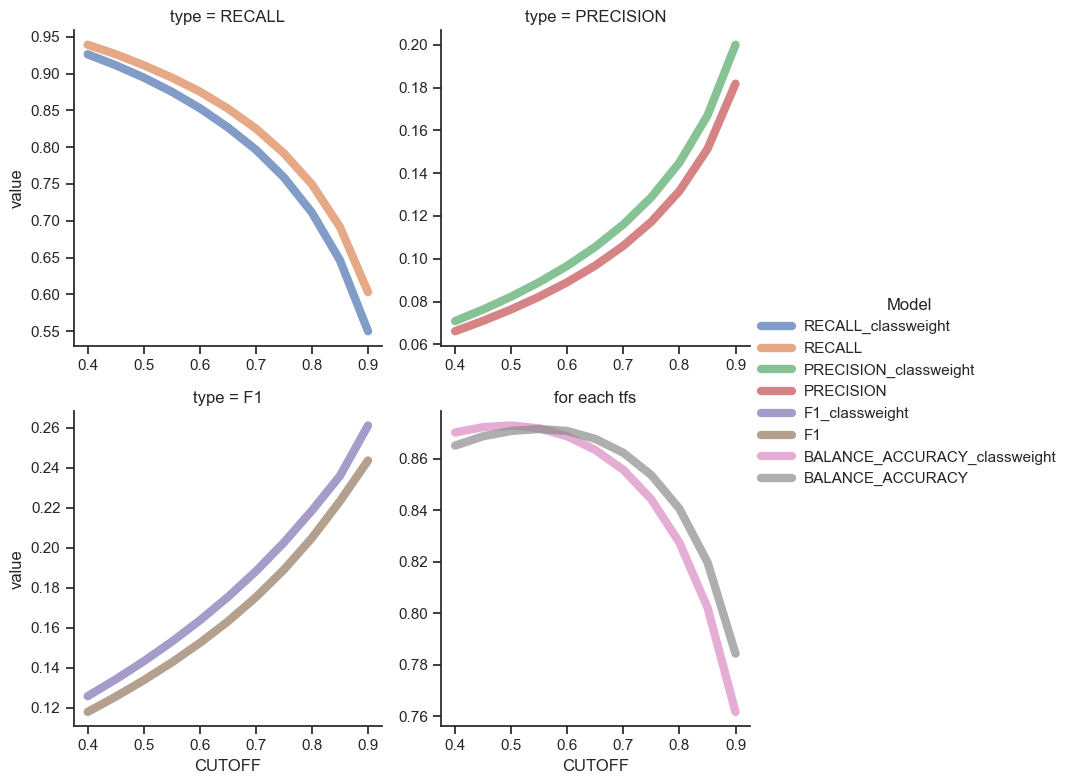

In [208]:
#palette = ['#DC143C', '#4169E1','#ff69b4']
cutoff_data = pd.DataFrame({"CUTOFF" : cutoffs,
                        "RECALL_classweight":recall_weight,
                        "RECALL" : recall_noweight,

                        "PRECISION_classweight" : precision_weight,
                        "PRECISION" : precision_noweight,

                        "F1_classweight": f1_weight,
                        "F1" : f1_noweight,

                        "BALANCE_ACCURACY_classweight" : balanced_accuracy_weight,
                        "BALANCE_ACCURACY" : balanced_accuracy_noweight,
                        })

cutoff_data = cutoff_data.melt(id_vars=['CUTOFF'],var_name="Model", value_name="value")
cutoff_data['type'] = [ i.split("_")[0] for i in cutoff_data['Model'].tolist() ]

# ---------------------- plot ---------------------- #
sns.relplot(
    data=cutoff_data,
    x="CUTOFF", y="value",
    hue="Model",
    kind='line', 
    col="type", col_wrap=2,
    #palette=palette[:2],
    height=4,
    aspect=1,
    lw=6, alpha = 0.7,
    facet_kws={'sharey': False, 'sharex': False}
)
plt.title("for each tfs")
plt.savefig("results/model.TBiNet.compare.GM12878.weight.pdf")

In [194]:

each_predict_balanced_accuracy_weight = []
each_predict_balanced_accuracy_noweight = []

cutoffs = []

for cutoff in pre_cutoffs:
    print(cutoff)
    cutoffs.append(cutoff)
    each_predict_balanced_accuracy_weight.append(get_mean_balanced_accuracy_score(targets_array_weight[targets_array_weight.sum(axis=1) >= 1], ori_predict_array_weight[targets_array_weight.sum(axis=1) >= 1], axis = 0, cutoff=cutoff))
    each_predict_balanced_accuracy_noweight.append(get_mean_balanced_accuracy_score(targets_array_noweight[targets_array_noweight.sum(axis=1) >= 1], ori_predict_array_noweight[targets_array_noweight.sum(axis=1) >= 1], axis = 0, cutoff=cutoff))

0.4
0.45
0.5
0.55
0.6
0.65
0.7
0.75
0.8
0.85
0.9


Text(0.5, 1.0, 'Balance Accuracy for each predicts')

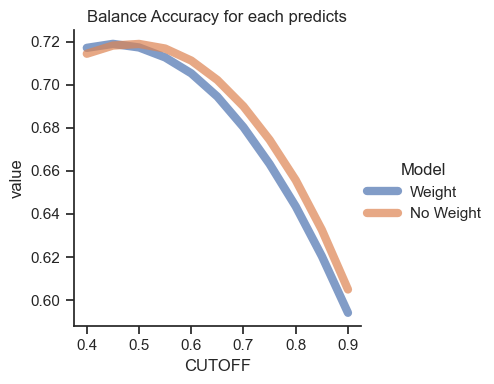

In [202]:
balance_accuracy_each_predict = pd.DataFrame({
    "CUTOFF" : cutoffs,
    "Weight" : each_predict_balanced_accuracy_weight,
    "No Weight" : each_predict_balanced_accuracy_noweight,
    })

balance_accuracy_each_predict = balance_accuracy_each_predict.melt(id_vars=['CUTOFF'],var_name="Model", value_name="value")
balance_accuracy_each_predict['type'] = 'Balanced Accuracy'
#balance_accuracy_each_predict['type'] = [ i.split("_")[0] for i in balance_accuracy_each_predict['Model'].tolist() ]

sns.relplot(
    data=balance_accuracy_each_predict,
    x="CUTOFF", y="value",
    hue="Model",
    kind='line', 
    col="type",
    col_wrap=1,
    #palette=palette[:2],
    height=4,
    aspect=1,
    lw=6, alpha = 0.7,
    facet_kws={'sharey': False, 'sharex': False}
)

plt.title("Balance Accuracy for each predicts")



In [214]:
cutoff_data[cutoff_data['type'] == "F1"].sort_values("Model")

,CUTOFF,Model,value,type
65,0.90,F1,0.243686,F1
63,0.80,F1,0.204998,F1
62,0.75,F1,0.189124,F1
61,0.70,F1,0.175353,F1
60,0.65,F1,0.163245,F1
59,0.60,F1,0.152476,F1
58,0.55,F1,0.142753,F1
57,0.50,F1,0.133858,F1
56,0.45,F1,0.125669,F1
55,0.40,F1,0.118034,F1


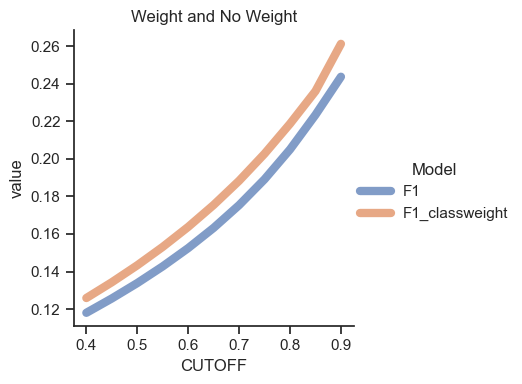

In [216]:
sns.relplot(
    data=cutoff_data[cutoff_data['type'] == "F1"].sort_values("Model"),
    x="CUTOFF", y="value",
    hue="Model",
    kind='line', 
    col="type",
    col_wrap=1,
    #palette=palette[:2],
    height=4,
    aspect=1,
    lw=6, alpha = 0.7,
    facet_kws={'sharey': False, 'sharex': False}
)

plt.title("Weight and No Weight")
plt.savefig("results/model.TBiNet.compare.GM12878.weight.F1.pdf")
